Notes:

SB19's songs are currently

1.) Possible objective is to find viral artists that managed to turn mainstay. We can use these artists as benchmark, and analyze the characteristics of their songs, release of their songs, etc. to turn SB19 to mainstay also.

2.) Find their most popular songs and analyze the characteristics on what makes it popular. Find artists to collab with.

3.)

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

from statsmodels.tsa.api import ExponentialSmoothing

from sklearn.metrics import mean_absolute_error, mean_squared_error

# import shap
import joblib
from tqdm import tqdm

In [ ]:
# Mount GDrive folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set home directory
import os
home_dir = "/content/drive/MyDrive/Eskwelabs_C12/Sprint3/" # Let's set the same directory for all siguro para no problem sa pag-run
os.chdir(home_dir)

# Data Preparation

In [ ]:
# Import charts dataset given from Kaggle
charts = pd.read_csv('daily_charts/ph_spotify_daily_charts_10_23.csv')
# Transform date column into a datetime column
charts['date'] = pd.to_datetime(charts['date'])
charts = charts.set_index('date')
charts.head()

,position,track_id,track_name,artist,streams,Unnamed: 0
date,,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,NaN
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,NaN
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,NaN
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,NaN
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,NaN


In [ ]:
# SB19 tracks included in the charts
SB19_tracks = charts[charts['artist']=='SB19'].groupby(['track_id', 'track_name', 'artist'])['streams'].sum().reset_index()
display(SB19_tracks.sort_values(by='streams', ascending=False))
print(f"Total no. of tracks: {SB19_tracks.shape[0]}")

,track_id,track_name,artist,streams
18,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,28411613
6,1o6uF8VmXna99ysHTcQRI2,GENTO,SB19,14703248
4,0QQoU68nnBRWJqr9ak3mnS,MAPA (Band Version),SB19,7146034
14,5QZw4F3N3PvuKNKHm9L20b,Bazinga,SB19,2378357
7,1z50Hub2XCsAPWo8zgoePu,WYAT (Where You At),SB19,965975
5,16GGH8OF6LiSUTTbm8421f,I WANT YOU,SB19,832865
8,2WUhR1SraSy0SVIQKohJb6,Hanggang Sa Huli,SB19,624990
13,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,533986
10,4sYZHEiueAYM5klpUbVNyk,What?,SB19,527582
9,3fNpKcMrEDrnjahY9kN5fQ,Alab (Burning),SB19,485997


Total no. of tracks: 21


In [ ]:
# Import updated tracks dataset
tracks = pd.read_csv('daily_charts/ph_spotify_daily_charts_tracks_10_23.csv')
tracks.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,75,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152,NaN
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,87,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043,NaN
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010,NaN
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000,NaN
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048,NaN


In [ ]:
tracks[tracks['track_id'] == '1o6uF8VmXna99ysHTcQRI2']

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


In [ ]:
# Check SB19 data
tracks[tracks['artist_name']=='SB19']#.describe()
# Note: parang kulang yung laman ng tracks csv since dapat 21 tracks meron for SB19

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
2300,5Gm6YoDs8N2WznOpASSB5P,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,7cnW5rl7F9OkVxqbcJPNCq,189100,2019-07-19,0,0.704,0.944,0.0,-2.308,0.0,0.0420,0.4230,0.000000,0.1320,0.913,125.996,NaN
2456,3fNpKcMrEDrnjahY9kN5fQ,Alab (Burning),3g7vYcdDXnqnDKYFwqXBJP,SB19,3twC225hfx6FrfrGAO3zvF,182750,2019-12-25,44,0.715,0.927,0.0,-2.120,1.0,0.0604,0.0176,0.000000,0.3400,0.792,119.974,NaN
2927,2WUhR1SraSy0SVIQKohJb6,Hanggang Sa Huli,3g7vYcdDXnqnDKYFwqXBJP,SB19,4JlsfnNH8MCDXR0ypy1zcm,254469,2020-07-31,55,0.539,0.553,2.0,-4.338,1.0,0.0276,0.7020,0.000000,0.2050,0.192,132.045,NaN
2928,053ZzdU3Rya4NMxiWMPqnq,Alab (Burning),3g7vYcdDXnqnDKYFwqXBJP,SB19,4JlsfnNH8MCDXR0ypy1zcm,182750,2020-07-31,49,0.715,0.927,0.0,-2.120,1.0,0.0606,0.0176,0.000000,0.3400,0.791,119.974,NaN
2929,5VoY18OYEE2E6RJCBd2jki,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,4JlsfnNH8MCDXR0ypy1zcm,189047,2020-07-31,51,0.702,0.941,0.0,-2.293,0.0,0.0428,0.4000,0.000000,0.1460,0.922,125.984,NaN
2930,6KawczP7xc6xQRIpOqvpey,Tilaluha,3g7vYcdDXnqnDKYFwqXBJP,SB19,4JlsfnNH8MCDXR0ypy1zcm,237428,2020-07-31,51,0.463,0.456,0.0,-6.846,0.0,0.0279,0.8260,0.000102,0.1440,0.218,139.736,NaN
2931,5p70OUKixtLRpnK5uSdqro,Love Goes,3g7vYcdDXnqnDKYFwqXBJP,SB19,4JlsfnNH8MCDXR0ypy1zcm,221544,2020-07-31,48,0.714,0.663,0.0,-5.596,1.0,0.1020,0.1960,0.000000,0.4860,0.681,89.984,NaN
2932,0LAh3hfeuUekvLm3Nq6MmA,Love Goes - EDM Version,3g7vYcdDXnqnDKYFwqXBJP,SB19,4JlsfnNH8MCDXR0ypy1zcm,215000,2020-07-31,45,0.718,0.780,9.0,-4.142,0.0,0.0557,0.1030,0.000000,0.3540,0.762,94.977,NaN
3337,4sYZHEiueAYM5klpUbVNyk,What?,3g7vYcdDXnqnDKYFwqXBJP,SB19,18g914rk7rcJP0o4uhz8uE,270192,2021-03-09,51,0.561,0.856,6.0,-3.710,0.0,0.1900,0.0575,0.000000,0.0728,0.507,95.975,NaN
3488,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,3g7vYcdDXnqnDKYFwqXBJP,SB19,4Qhx57hNp0CUmUbO2igtAq,275420,2021-05-16,59,0.561,0.651,9.0,-4.862,1.0,0.0689,0.3090,0.000000,0.3780,0.355,129.957,NaN


In [ ]:
# Importupdated artists dataset
artists = pd.read_csv('daily_charts/ph_spotify_daily_charts_artists_10_23.csv')
artists.head()

,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,51566811.0,"['dance pop', 'pop']",88.0
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,13966288.0,"['pop', 'talent show', 'uk pop']",81.0
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,20036566.0,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",81.0
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,40125006.0,['pop'],86.0
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,8535540.0,"['dance pop', 'pop', 'post-teen pop']",73.0


In [ ]:
# Check SB19 data
artists[artists['artist_name']=='SB19']

,artist_id,artist_name,total_followers,genres,popularity
606,3g7vYcdDXnqnDKYFwqXBJP,SB19,626946.0,"['opm', 'p-pop', 'pinoy idol pop']",59.0


In [ ]:
chart_df=charts.merge(tracks, on='track_id',how='left')
chart_df.head()

chart_df=chart_df.merge(artists, on='artist_id',how='left')
chart_df.head()

,position,track_id,track_name_x,artist,streams,Unnamed: 0,track_name_y,artist_id,artist_name_x,album_id,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,artist_name_y,total_followers,genres,popularity_y
0,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,NaN,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,...,0.196,0.0,0.0830,0.301,174.152,NaN,Bruno Mars,51566811.0,"['dance pop', 'pop']",88.0
1,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,NaN,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,...,0.196,0.0,0.0830,0.301,174.152,261240.0,Bruno Mars,51566811.0,"['dance pop', 'pop']",88.0
2,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,NaN,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,...,0.695,0.0,0.0902,0.494,85.043,NaN,James Arthur,13966288.0,"['pop', 'talent show', 'uk pop']",81.0
3,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,NaN,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,...,0.695,0.0,0.0902,0.494,85.043,211467.0,James Arthur,13966288.0,"['pop', 'talent show', 'uk pop']",81.0
4,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,NaN,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,...,0.414,0.0,0.1110,0.661,95.010,NaN,The Chainsmokers,20036566.0,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",81.0


In [ ]:
target_genres = ['opm', 'p-pop', 'pinoy idol pop']

# Create a mask for rows that contain any of the target genres
mask = chart_df['genres'].str.contains('|'.join(target_genres), case=False, na=False)

# Filter the DataFrame using the mask
df_filtered = chart_df[mask]

# Compute total streams per artist for target genres
total_streams_per_artist_filtered = df_filtered.groupby('artist')['streams'].sum().reset_index()

# Get the artist with the highest streams within the target genres
highest_artist = total_streams_per_artist_filtered.nlargest(5, 'streams')

print(highest_artist)

              artist     streams
27           Ben&Ben  1861755584
141     Zack Tabudlo  1062314130
20       Arthur Nery   873823685
4               Adie   789464302
39   December Avenue   623754765


In [ ]:
target_genres = [ 'p-pop', 'pinoy idol pop']

# Create a mask for rows that contain any of the target genres
mask = chart_df['genres'].str.contains('|'.join(target_genres), case=False, na=False)

# Filter the DataFrame using the mask
df_filtered = chart_df[mask]

# Compute total streams per artist for target genres
total_streams_per_artist_filtered = df_filtered.groupby('artist')['streams'].sum().reset_index()

# Get the artist with the highest streams within the target genres
highest_artist = total_streams_per_artist_filtered.nlargest(5, 'streams')

print(highest_artist)

          artist     streams
13  Zack Tabudlo  1062314130
1    Arthur Nery   873823685
4   IV Of Spades   475527239
6   Magnus Haven   204815663
12     This Band   181243374


# Exploratory Data Analysis (EDA)

Possible things we can check:
* Time series plots
* Outliers (choose a method)
* STL decomposition
* ACF and PCF

## Time Series Plot

Text(0.5, 1.0, 'SB19 Daily Streams')

<Figure size 200x1500 with 0 Axes>

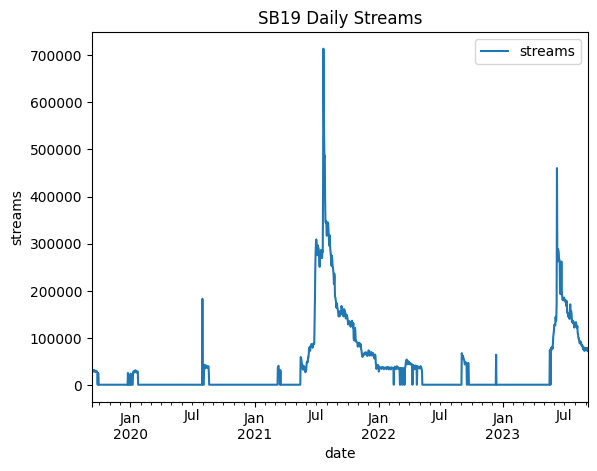

In [ ]:
# Time series plot of daily streams
data = charts[(charts['artist']=='SB19')][['streams']].resample('D').sum()
data = data.asfreq('D') # Add to complete dates
data['streams'] = data['streams'].fillna(method='ffill')

plt.figure(figsize=(2, 15))

data[['streams']].plot()

plt.ylabel('streams')
plt.title('SB19 Daily Streams')

In [ ]:
# Identify peak daily streams
data[data['streams']==data['streams'].max()]

,streams
date,
2021-07-22,714206


In [ ]:
# Top 5 SB19 tracks based on streams
SB19_top_5 = SB19_tracks.sort_values(by='streams', ascending=False).head()
SB19_top_5

,track_id,track_name,artist,streams
18,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,28411613
6,1o6uF8VmXna99ysHTcQRI2,GENTO,SB19,14703248
4,0QQoU68nnBRWJqr9ak3mnS,MAPA (Band Version),SB19,7146034
14,5QZw4F3N3PvuKNKHm9L20b,Bazinga,SB19,2378357
7,1z50Hub2XCsAPWo8zgoePu,WYAT (Where You At),SB19,965975


In [ ]:
# Plot daily streams of top 5 songs
data_1 = charts[(charts['track_id']=='6Fz2TpxUD0YvAPsuG8nDMJ')]['2017-01-01':][['streams']].resample('D').sum()
data_1 = data_1.asfreq('D') # Add to complete dates
data_1['streams'] = data_1['streams'].fillna(method='ffill')

data_2 = charts[(charts['track_id']=='1o6uF8VmXna99ysHTcQRI2')]['2017-01-01':][['streams']].resample('D').sum()
data_2 = data_2.asfreq('D') # Add to complete dates
data_2['streams'] = data_2['streams'].fillna(method='ffill')

data_3 = charts[(charts['track_id']=='0QQoU68nnBRWJqr9ak3mnS')]['2017-01-01':][['streams']].resample('D').sum()
data_3 = data_3.asfreq('D') # Add to complete dates
data_3['streams'] = data_3['streams'].fillna(method='ffill')

data_4 = charts[(charts['track_id']=='5QZw4F3N3PvuKNKHm9L20b')]['2017-01-01':][['streams']].resample('D').sum()
data_4 = data_4.asfreq('D') # Add to complete dates
data_4['streams'] = data_4['streams'].fillna(method='ffill')

data_5 = charts[(charts['track_id']=='1z50Hub2XCsAPWo8zgoePu')]['2017-01-01':][['streams']].resample('D').sum()
data_5 = data_5.asfreq('D') # Add to complete dates
data_5['streams'] = data_5['streams'].fillna(method='ffill')

#6ZUSwmLViVASwgHkYWyc3Z - golden hour
#data_6 = charts[(charts['track_id']=='6ZUSwmLViVASwgHkYWyc3Z')]['2017-01-01':][['streams']].resample('D').sum()
#data_6 = data_6.asfreq('D') # Add to complete dates
#data_6['streams'] = data_6['streams'].fillna(method='ffill')

<ipython-input-47-d6299eb483f9>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data_1 = charts[(charts['track_id']=='6Fz2TpxUD0YvAPsuG8nDMJ')]['2017-01-01':][['streams']].resample('D').sum()


Text(0.5, 1.0, 'Spotify Daily Streams of Top Songs')

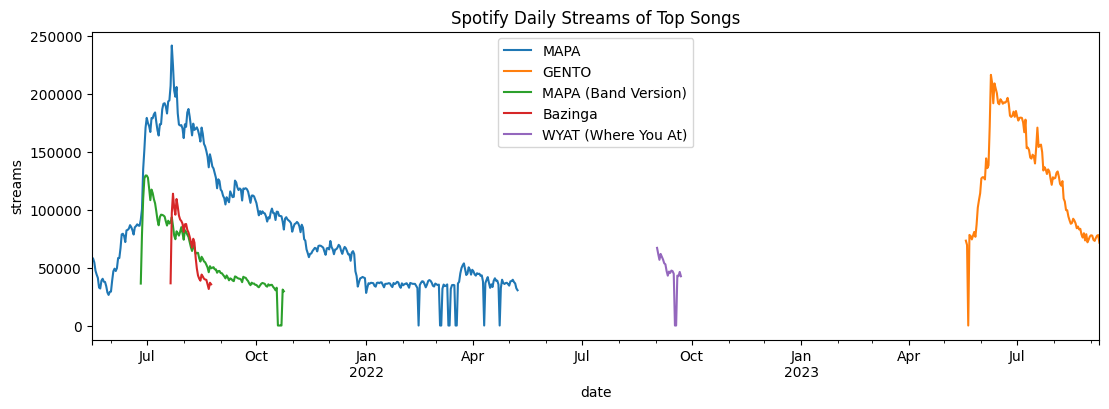

In [ ]:
fig, ax = plt.subplots(figsize=(13,4))
data1 = data_1['streams']
data2 = data_2['streams']
data3 = data_3['streams']
data4 = data_4['streams']
data5 = data_5['streams']
#data6 = data_6['streams']

#data1.plot(ax=ax, label='raw')
data1.plot(ax=ax, label='MAPA')
data2.plot(ax=ax, label='GENTO')
data3.plot(ax=ax, label='MAPA (Band Version)')
data4.plot(ax=ax, label='Bazinga')
data5.plot(ax=ax, label='WYAT (Where You At)')
#data6.plot(ax=ax, label='golden hour - SB19 remix')

plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams of Top Songs')

<ipython-input-49-6b900e521ba1>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = charts[(charts['artist']=='SB19')]['2019-01-01':][['streams']].resample('MS').sum()


Text(0.5, 1.0, 'SB19 Monthly Streams (In ten millions)')

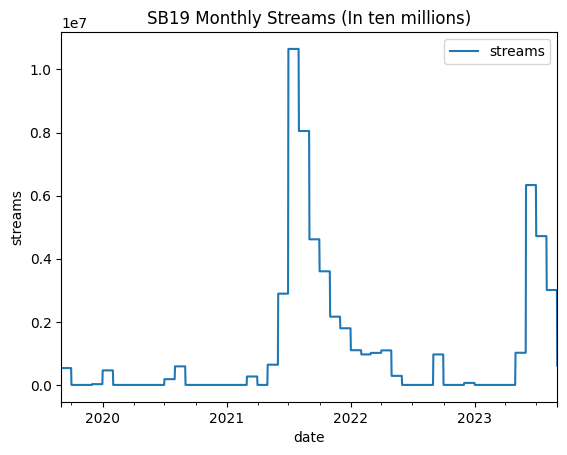

In [ ]:
# Time Series plot of Monthly Streams
data = charts[(charts['artist']=='SB19')]['2019-01-01':][['streams']].resample('MS').sum()
data = data.asfreq('D') # Add to complete dates
data['streams'] = data['streams'].fillna(method='ffill')
data[['streams']].plot()

plt.ylabel('streams')
plt.title('SB19 Monthly Streams (In ten millions)')

<ipython-input-32-edb6f2bbb532>:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = charts[(charts['artist']=='SB19')]['2019-01-01':][['streams']].resample('Y').sum()


Text(0.5, 1.0, 'SB19 Yearly Streams (In ten millions)')

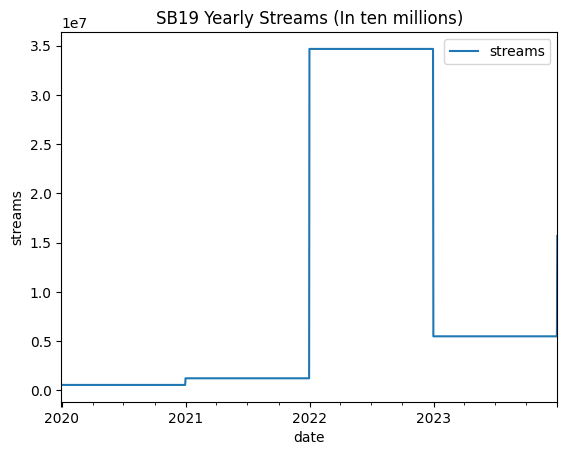

In [ ]:
# Time Series plot of Yearly Streams
# Time Series plot of Monthly Streams
data = charts[(charts['artist']=='SB19')]['2019-01-01':][['streams']].resample('Y').sum()
data = data.asfreq('D') # Add to complete dates
data['streams'] = data['streams'].fillna(method='ffill')
data[['streams']].plot()

plt.ylabel('streams')
plt.title('SB19 Yearly Streams (In ten millions)')

## Track Analysis

In [ ]:
tracks[tracks['artist_name']=='SB19'].describe()

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.00000,17.000000,17.000000,17.000000,17.000000,17.000000,0.0
mean,232834.176471,48.764706,0.658824,0.744000,3.647059,-4.589412,0.529412,0.07310,0.251553,0.000121,0.270247,0.547000,115.536353,NaN
std,43663.798468,13.292523,0.118694,0.170371,4.152427,2.392691,0.514496,0.05625,0.239987,0.000472,0.195523,0.262369,18.041441,NaN
min,182750.000000,0.000000,0.463000,0.394000,0.000000,-10.784000,0.000000,0.02760,0.017600,0.000000,0.068400,0.191000,89.984000,NaN
25%,199013.000000,49.000000,0.561000,0.655000,0.000000,-6.164000,0.000000,0.03680,0.057500,0.000000,0.127000,0.355000,95.975000,NaN
50%,221544.000000,51.000000,0.702000,0.780000,1.000000,-4.338000,1.000000,0.06040,0.196000,0.000000,0.205000,0.507000,119.974000,NaN
75%,259565.000000,54.000000,0.715000,0.922000,9.000000,-2.308000,1.000000,0.06890,0.400000,0.000000,0.354000,0.783000,126.915000,NaN
max,346849.000000,59.000000,0.869000,0.944000,10.000000,-1.452000,1.000000,0.23000,0.826000,0.001950,0.831000,0.922000,146.048000,NaN


In [ ]:
# Release dates of their songs
track_release_dates = tracks[tracks['artist_name']=='SB19'][['track_id', 'track_name', 'artist_name', 'release_date']]
track_release_dates

,track_id,track_name,artist_name,release_date
2300,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,2019-07-19
2456,3fNpKcMrEDrnjahY9kN5fQ,Alab (Burning),SB19,2019-12-25
2927,2WUhR1SraSy0SVIQKohJb6,Hanggang Sa Huli,SB19,2020-07-31
2928,053ZzdU3Rya4NMxiWMPqnq,Alab (Burning),SB19,2020-07-31
2929,5VoY18OYEE2E6RJCBd2jki,Go Up,SB19,2020-07-31
2930,6KawczP7xc6xQRIpOqvpey,Tilaluha,SB19,2020-07-31
2931,5p70OUKixtLRpnK5uSdqro,Love Goes,SB19,2020-07-31
2932,0LAh3hfeuUekvLm3Nq6MmA,Love Goes - EDM Version,SB19,2020-07-31
3337,4sYZHEiueAYM5klpUbVNyk,What?,SB19,2021-03-09
3488,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,2021-05-16


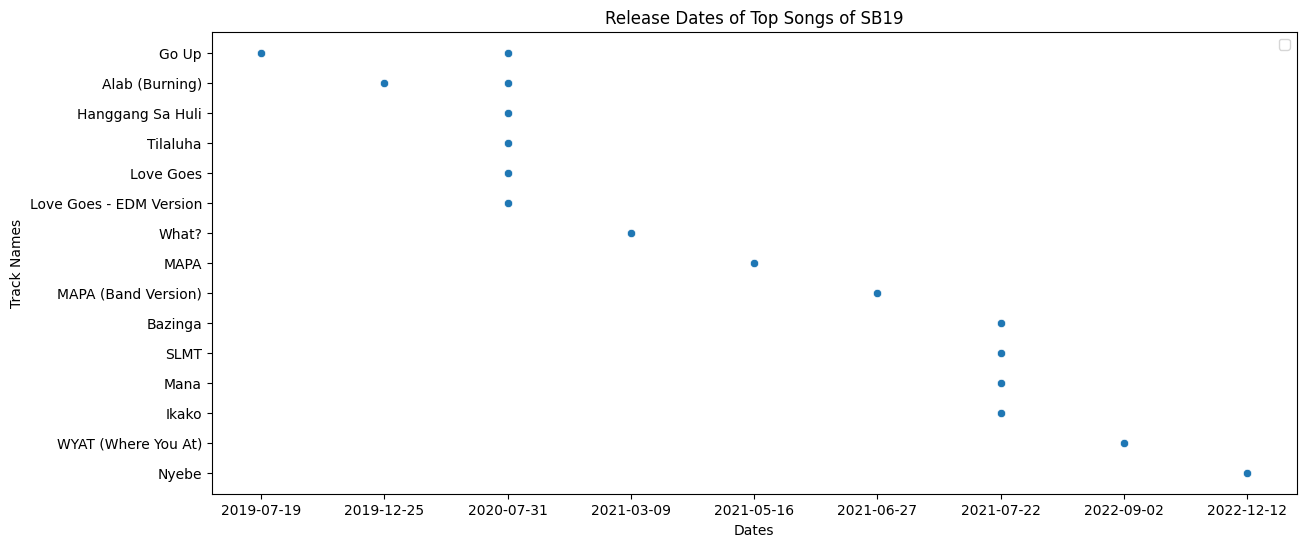

In [ ]:
# Plot of release date of songs in the tracks

# Set the figure size
plt.figure(figsize=(14, 6))

# Create a scatter plot with legend
sns.scatterplot(x=track_release_dates['release_date'], y=track_release_dates['track_name'])

# Set labels and title
plt.xlabel('Dates')
plt.ylabel('Track Names')
plt.title('Release Dates of Top Songs of SB19')

# Add legend
plt.legend()

# Display the plot
plt.show()

## Outlier Detection

In [ ]:
def plot_ts_data(data, lower_bound, upper_bound, mark_outliers=True):
    fig = plt.subplots(figsize=(13,4))
    plt.plot(data)
    plt.fill_between(data.index, lower_bound, upper_bound, color='k',alpha=0.15)

    if mark_outliers:
        data_above_ub = data[data['streams']>upper_bound]
        data_below_lb = data[data['streams']<lower_bound]
        plt.plot(data_above_ub, color='C1', marker='o', ms=3, lw=0)
        plt.plot(data_below_lb, color='C2', marker='o', ms=3, lw=0)

    plt.legend()
    plt.ylabel('streams')

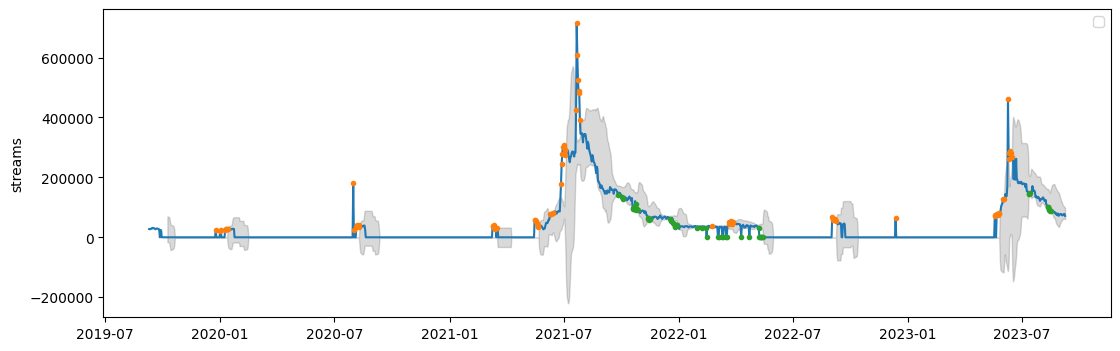

In [ ]:
# IQR-based window bounds
# Set window size
BOUNDS_WINDOW = 30

# Use rolling in combination with quantile
p25_data = data['streams'].rolling(BOUNDS_WINDOW).quantile(0.25)
mdn_data = data['streams'].rolling(BOUNDS_WINDOW).quantile(0.5)
p75_data = data['streams'].rolling(BOUNDS_WINDOW).quantile(0.75)

# Compute rolling IQR and bounds
IQR_data = p75_data - p25_data

lb_data = mdn_data - 1.5*IQR_data
ub_data = mdn_data + 1.5*IQR_data

plot_ts_data(data, lb_data, ub_data, mark_outliers=True)

## STL Decomposition

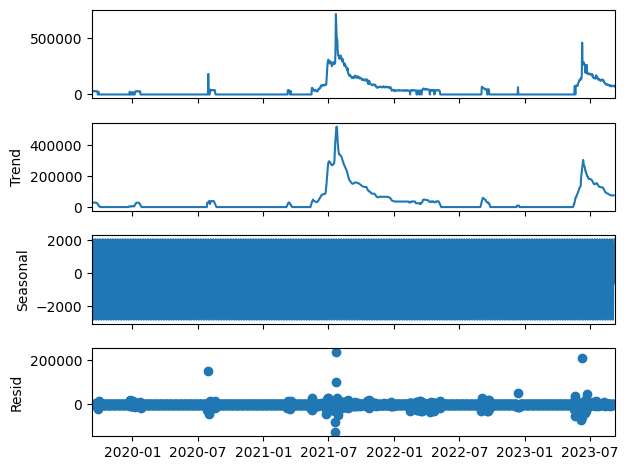

In [ ]:
# Code here
res = sm.tsa.seasonal_decompose(data)
resplot = res.plot()

<Axes: xlabel='date'>

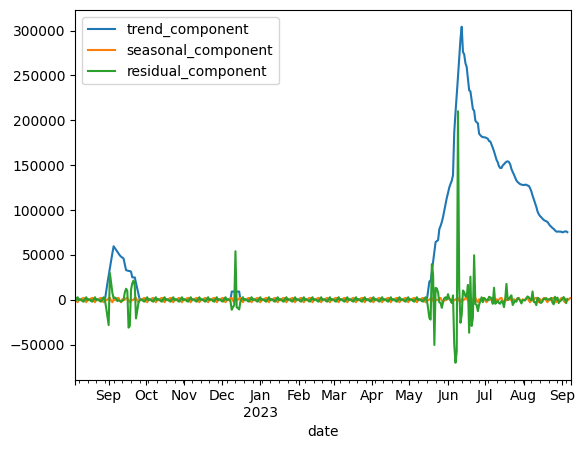

In [ ]:
# Store each component in a dataframe
# Zoom in most recent
data_decomposed = data.copy()
data_decomposed['trend_component'] = res.trend
data_decomposed['seasonal_component'] = res.seasonal
data_decomposed['residual_component'] = res.resid
data_decomposed[['trend_component','seasonal_component', 'residual_component' ]].tail(400).plot()

## Similar Artists

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels import datasets
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.ensemble import IsolationForest
from statsmodels.tsa.stattools import adfuller

In [ ]:
charts_df = pd.read_csv('data/playlists/daily_charts/ph_spotify_daily_charts_10_23.csv')
# transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df = charts_df.set_index('date')
charts_df.head()

,position,track_id,track_name,artist,streams,Unnamed: 0
date,,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,NaN
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,NaN
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,NaN
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,NaN
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,NaN


In [ ]:
# opm
artists = ['Ben&Ben', 'Zack Tabudlo', 'Moira Dela Torre', 'December Avenue', 'Arthur Nerry']

# pinoy pop
# artists = ['Zack Tabudlo', 'Arthur Nerry', 'IV Of Spades', 'This Band', 'Magnus Haven']

<ipython-input-65-f231129dc615>:12: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data1 = charts_df[(charts_df['artist']==artist)][['streams']]['2019-09-10':].resample('D').sum()


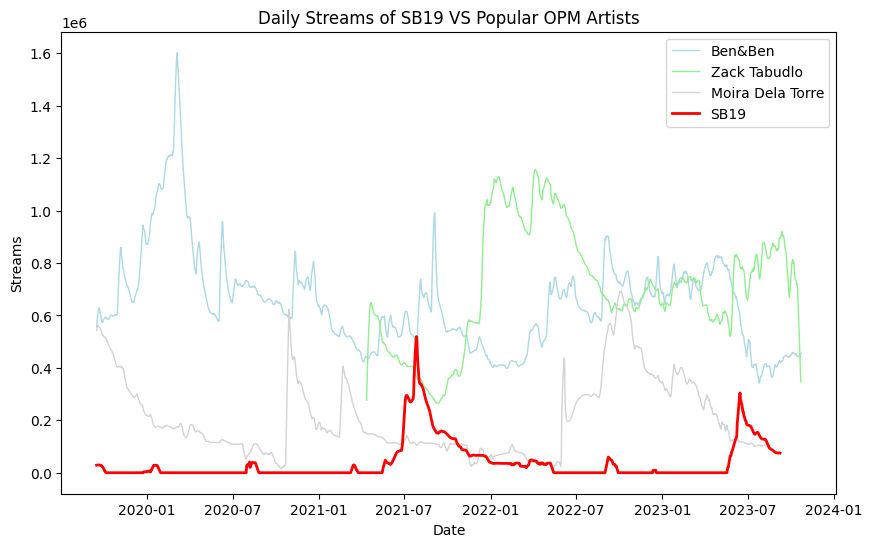

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Popular OPM artists vs SB19
artists_w_sb19 = ['Ben&Ben', 'Zack Tabudlo', 'Moira Dela Torre', 'SB19']

fig, ax = plt.subplots(figsize=(10, 6))

for artist in artists_w_sb19:
    data1 = charts_df[(charts_df['artist']==artist)][['streams']]['2019-09-10':].resample('D').sum()
    data1 = data1.asfreq('D') # Add to complete dates
    data1['streams'] = data1['streams'].interpolate().rolling(7).mean()
    if artist == 'SB19':
        sns.lineplot(data=data1, x=data1.index, y='streams', label=artist, ax=ax, color='red', linewidth=2)  # Highlight SB19
    elif artist == 'Ben&Ben':
        sns.lineplot(data=data1, x=data1.index, y='streams', label=artist, ax=ax, color='lightblue', linewidth=1)  # Highlight SB19
    elif artist == 'Zack Tabudlo':
        sns.lineplot(data=data1, x=data1.index, y='streams', label=artist, ax=ax, color='lightgreen', linewidth=1)  # Highlight SB19
    else:
        sns.lineplot(data=data1, x=data1.index, y='streams', label=artist, ax=ax, color='lightgray', linewidth=1)  # Lighter color for other artists

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Streams')
ax.set_title('Daily Streams of SB19 VS Popular OPM Artists')

# Show the legend
plt.legend(loc='best')

# Show the plot
plt.show()


# Forecasting

## Data Preparation

In [ ]:
charts_df = pd.read_csv('daily_charts/ph_spotify_daily_charts_10_23.csv')
tracks_df = pd.read_csv('playlists/top_200_tracks.csv')
charts_df = charts_df.merge(tracks_df, on='track_id', how='left')
charts_df = charts_df.drop(columns=['Unnamed: 0', 'track_name_y', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'predicted_genre_id'])
charts_df = charts_df.rename(columns={'track_name_x':'track_name'})

In [ ]:
charts_df = charts_df.dropna()

In [ ]:
# transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df = charts_df.set_index('date')
charts_df.head()

,position,track_id,track_name,artist,streams,predicted_genre
date,,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,jazz
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,jazz
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,electronic
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,electronic
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,jazz


## Error Definition

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def show_errors(y_true, y_pred):
    return pd.DataFrame({'RMSE': root_mean_squared_error(y_true,y_pred),\
                                            'MAE':mean_absolute_error(y_true,y_pred),\
                                            'MAPE': mean_absolute_percentage_error(y_true,y_pred)}, index=[0])

## Time Series Plot

In [ ]:
genres = {'jazz', 'electronic', 'rock', 'rap', 'r&b'}

In [ ]:
genre_dfs = {}

for genre in genres:
  genre_df = charts_df[charts_df['predicted_genre']== genre]['2017-01-01':][['streams']].resample('D').sum()
  genre_df = genre_df.asfreq('D') # Add to complete dates
  genre_df['streams'] = genre_df['streams'].fillna(method='ffill')
  genre_dfs[f'{genre}_df'] = genre_df

In [ ]:
jazz_df = genre_dfs['jazz_df']
electronic_df = genre_dfs['electronic_df']
rock_df = genre_dfs['rock_df']
rnb_df = genre_dfs['r&b_df']
rap_df = genre_dfs['rap_df']

Text(0.5, 1.0, 'Spotify Daily Streams per Genre')

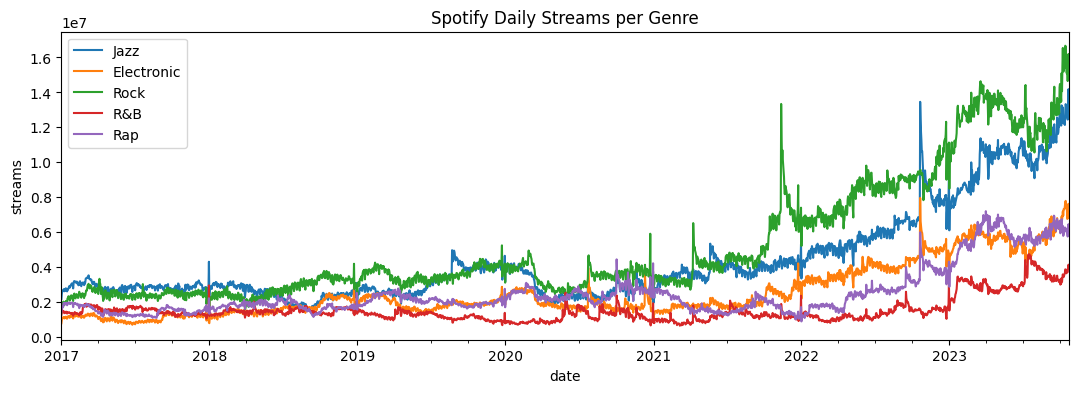

In [ ]:
fig, ax = plt.subplots(figsize=(13,4))
jazz = jazz_df['streams']
electronic = electronic_df['streams']
rock = rock_df['streams']
rnb = rnb_df['streams']
rap = rap_df['streams']

#data1.plot(ax=ax, label='raw')
jazz.plot(ax=ax, label='Jazz')
electronic.plot(ax=ax, label='Electronic')
rock.plot(ax=ax, label='Rock')
rnb.plot(ax=ax, label='R&B')
rap.plot(ax=ax, label='Rap')


plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams per Genre')

In [ ]:
# split dataset to training and test sets; use r&b dataset for now
train_df = rnb_df[:'2023-08-15']
test_df = rnb_df['2023-08-16':]

Text(0, 0.5, 'Streams x 100K')

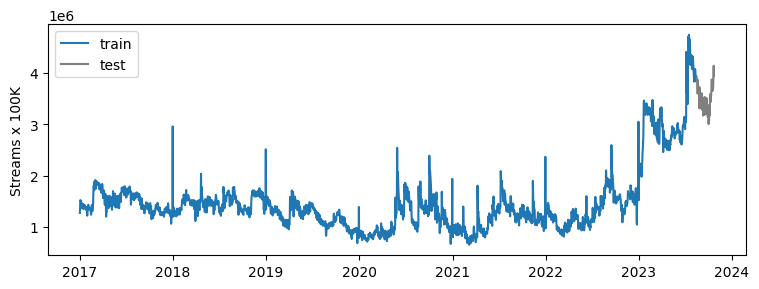

In [ ]:
# Plot the training and testing period
fig = plt.figure(figsize=(9,3))
plt.plot(train_df['streams'], color='C0', label='train')
plt.plot(test_df['streams'], color='C7', label='test')
plt.legend()
plt.ylabel("Streams x 100K")

## Time Series Forecasting using Holt-Winters Seasonal Method

### Using training and testing dataset

In [ ]:
# specify fit for weekly (d=7) seasonal cycles
# assume additive combinations of component
model_fit = ExponentialSmoothing(train_df['streams'],seasonal_periods=7 ,trend='add', seasonal='add').fit()
forecast_df = pd.DataFrame(model_fit.forecast(len(test_df)).values, index=test_df.index,\
                           columns=['streams'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0, 0.5, 'Streams x 100K')

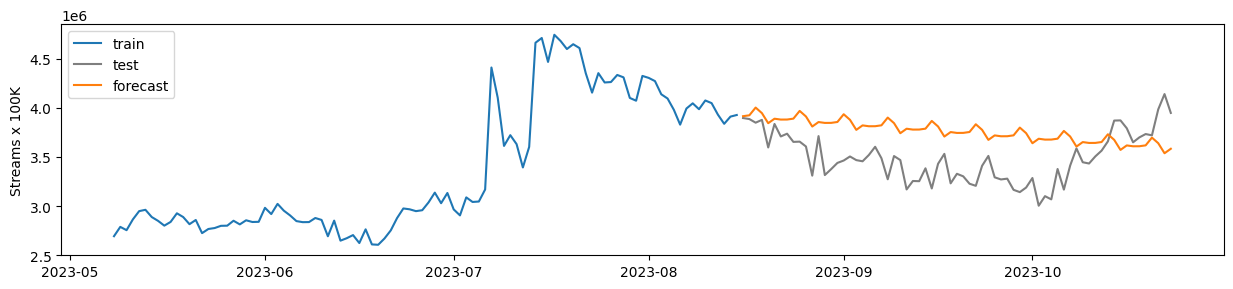

In [ ]:
# plot the forecast results
fig = plt.figure(figsize=(15,3))

plt.plot(train_df['streams'].tail(100), color='C0', label='train')
plt.plot(test_df['streams'], color='C7', label='test')
plt.plot(forecast_df['streams'], color='C1', label='forecast')
plt.legend()
plt.ylabel("Streams x 100K")

In [ ]:
# Error values code here
show_errors(test_df['streams'],forecast_df['streams'])

,RMSE,MAE,MAPE
0,386977.817025,337124.819253,9.989867


### Forecast entire dataset to 1 year in the future

In [ ]:
# Fit the Exponential Smoothing model to the whole R&B dataset
rnb_model_fit = ExponentialSmoothing(rnb_df['streams'], seasonal_periods=7, trend='add', seasonal='add').fit()

# Forecast multiple years into the future
num_years = 1
rnb_forecast_periods = 365 * num_years  # Define the number of days into the future you want to forecast
rnb_forecast = rnb_model_fit.forecast(steps=rnb_forecast_periods)

# Create a date range for the forecast
rnb_forecast_dates = pd.date_range(start=rnb_df.index[-1] + pd.DateOffset(1), periods=rnb_forecast_periods, freq='D')

# Create a DataFrame for the forecast
rnb_forecast_df = pd.DataFrame(rnb_forecast, index=rnb_forecast_dates, columns=['streams'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
genre_dataframes = {
    'jazz': jazz_df,
    'electronic': electronic_df,
    'rock': rock_df,
    'rap': rap_df,
    'rnb': rnb_df
}

genres_list = list(genre_dataframes.keys())

for genre in genres_list:

    df = genre_dataframes[genre]

    # Fit the Exponential Smoothing model to the genre-specific dataset
    model_fit = ExponentialSmoothing(df['streams'], seasonal_periods=7, trend='add', seasonal='add').fit()

    # Forecast multiple years into the future
    num_years = 1
    forecast_periods = 365 * num_years  # Define the number of days into the future you want to forecast
    forecast = model_fit.forecast(steps=forecast_periods)

    # Create a date range for the forecast
    forecast_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=forecast_periods, freq='D')

    # Create a DataFrame for the forecast
    forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['streams'])

    # Store the forecast DataFrame with a genre-specific name
    globals()[f'{genre}_forecast_df'] = forecast_df

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0, 0.5, 'Streams x 100K')

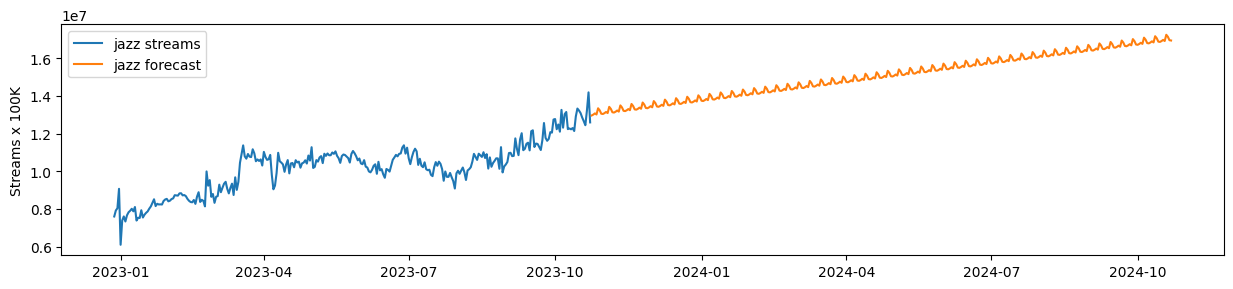

In [ ]:
# plot the forecast results
fig = plt.figure(figsize=(15,3))

plt.plot(jazz_df['streams'].tail(300), color='C0', label='jazz streams')
plt.plot(jazz_forecast_df['streams'], color='C1', label='jazz forecast')
plt.legend()
plt.ylabel("Streams x 100K")

Text(0, 0.5, 'Streams x 100K')

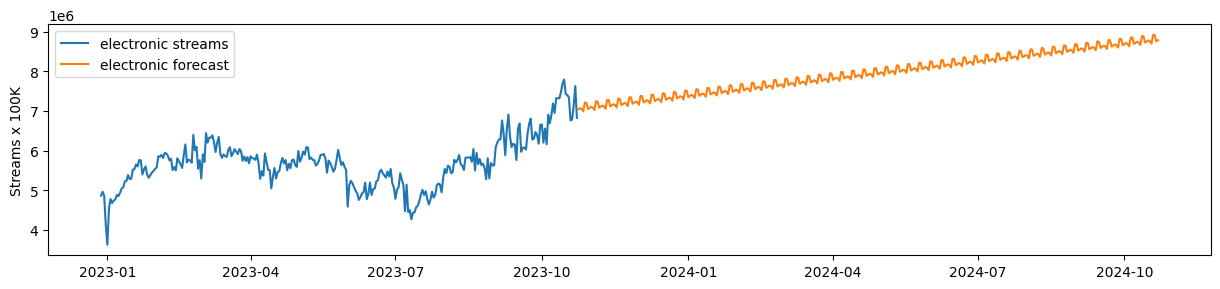

In [ ]:
# plot the forecast results
fig = plt.figure(figsize=(15,3))

plt.plot(electronic_df['streams'].tail(300), color='C0', label='electronic streams')
plt.plot(electronic_forecast_df['streams'], color='C1', label='electronic forecast')
plt.legend()
plt.ylabel("Streams x 100K")

Text(0, 0.5, 'Streams x 100K')

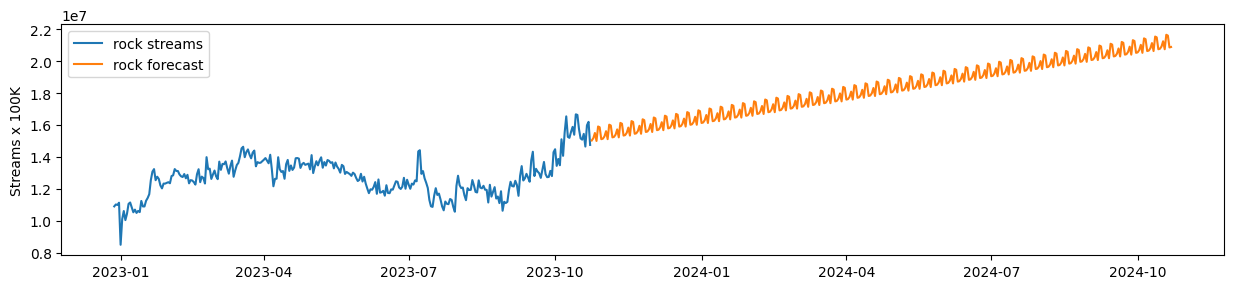

In [ ]:
# plot the forecast results
fig = plt.figure(figsize=(15,3))

plt.plot(rock_df['streams'].tail(300), color='C0', label='rock streams')
plt.plot(rock_forecast_df['streams'], color='C1', label='rock forecast')
plt.legend()
plt.ylabel("Streams x 100K")

Text(0, 0.5, 'Streams x 100K')

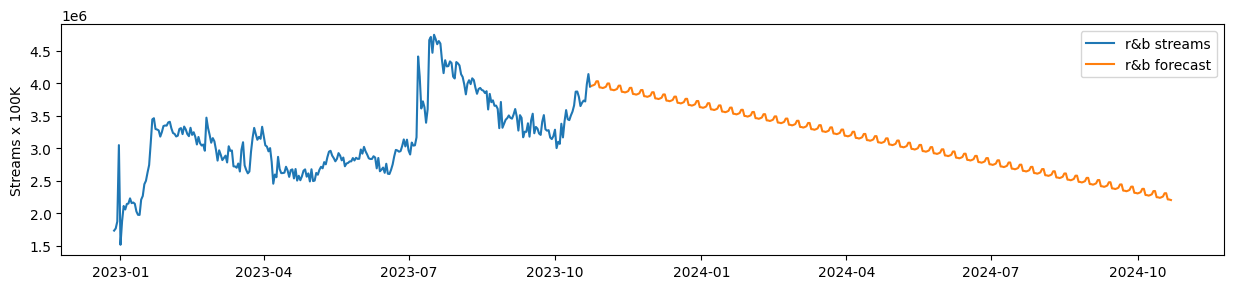

In [ ]:
# plot the forecast results
fig = plt.figure(figsize=(15,3))

plt.plot(rnb_df['streams'].tail(300), color='C0', label='r&b streams')
plt.plot(rnb_forecast_df['streams'], color='C1', label='r&b forecast')
plt.legend()
plt.ylabel("Streams x 100K")

Text(0, 0.5, 'Streams x 100K')

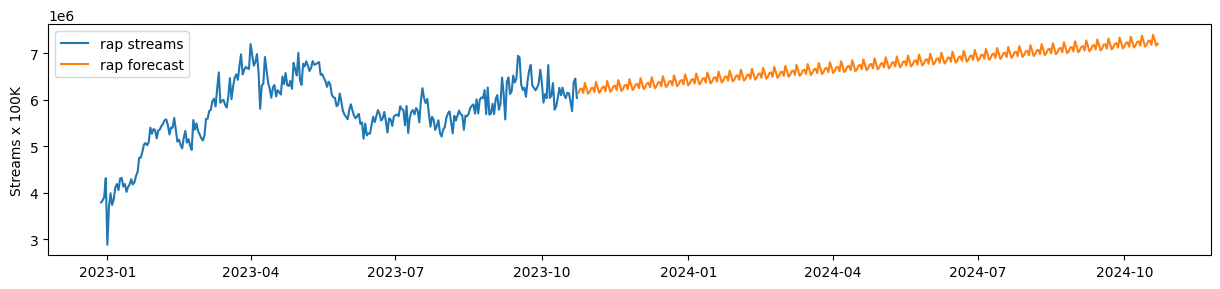

In [ ]:
# plot the forecast results
fig = plt.figure(figsize=(15,3))

plt.plot(rap_df['streams'].tail(300), color='C0', label='rap streams')
plt.plot(rap_forecast_df['streams'], color='C1', label='rap forecast')
plt.legend()
plt.ylabel("Streams x 100K")

In [ ]:
# Combine real data with forecasted data per genre
combined_dataframes = {}

for genre in genres_list:
    # Combine the genre-specific DataFrame and forecast DataFrame
    combined_df = genre_dataframes[genre].append(globals()[f'{genre}_forecast_df'])

    globals()[f'{genre}_combined_df'] = combined_df

<ipython-input-36-f37632a14ae1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = genre_dataframes[genre].append(globals()[f'{genre}_forecast_df'])
<ipython-input-36-f37632a14ae1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = genre_dataframes[genre].append(globals()[f'{genre}_forecast_df'])
<ipython-input-36-f37632a14ae1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = genre_dataframes[genre].append(globals()[f'{genre}_forecast_df'])
<ipython-input-36-f37632a14ae1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = genre_dataframes[genre].append(globals()[f'{genre}_forecast_df'])


Text(0.5, 1.0, 'Spotify Daily Streams per Genre')

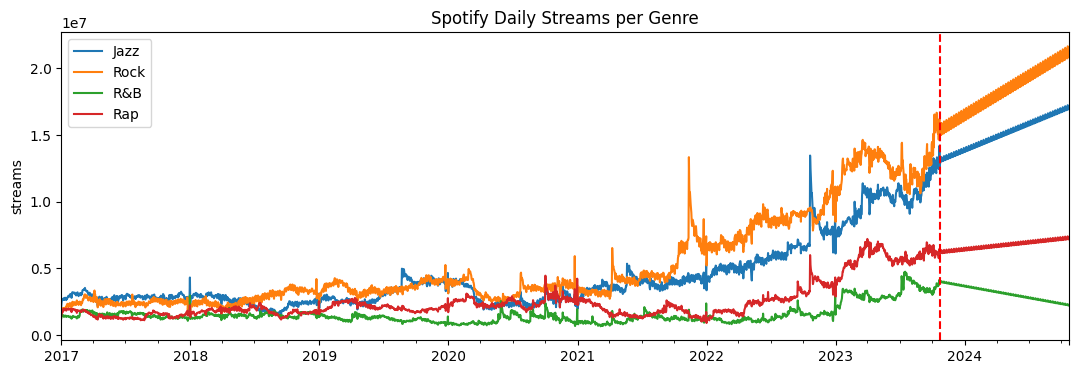

In [ ]:
fig, ax = plt.subplots(figsize=(13,4))
jazz_total = jazz_combined_df['streams']
#electronic_total = electronic_combined_df['streams']
rock_total = rock_combined_df['streams']
rnb_total = rnb_combined_df['streams']
rap_total = rap_combined_df['streams']

#data1.plot(ax=ax, label='raw')
jazz_total.plot(ax=ax, label='Jazz')
#electronic_total.plot(ax=ax, label='Electronic')
rock_total.plot(ax=ax, label='Rock')
rnb_total.plot(ax=ax, label='R&B')
rap_total.plot(ax=ax, label='Rap')

# Draw a vertical line at the specified x-coordinate
vertical_line_x = '2023-10-23'
plt.axvline(x=vertical_line_x, color='red', linestyle='--', label='')

plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams per Genre')